# Summer 2022 Data Science Intern Challenge
### Maanav Singh

**Challenge Context:** 
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 



In [ ]:
import pandas as pd

# load dataset into pandas dataframe
challenge_df = pd.read_csv('./2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
challenge_df.head(10) # show first 10 entries

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [ ]:
# show DF summary
challenge_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


<AxesSubplot:>

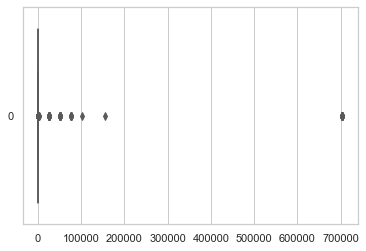

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Let's visualize the order_amount and total_item distributions
# A boxplot should work well
ax = sns.boxplot(data=challenge_df['order_amount'], orient="h", palette="Set2")
ax


Well, this first attempt at visualizing the data didn't go too well. 

This is because there exists a few very large outliers. Making the distinction between all of the lower quartiles very difficult.

**Let's try fixing this by ommiting some large outliers.** *i.e values greater than the IQR * 1.5*

Now that we've loaded in the csv. A few key features stand out:
- There are 5000 total items
- The mean order amount is $3145.13! (AOV)
- The max order amount is $704,000! A big outlier which would pull a measure of central tendancy like the mean
- Each order has an atribute: "total_items" -- which maxes out at 2,000. Some shoe orders are large in quantity

These observations shed some light on the initial assumptions of the prompt.

**The prompt assumes that the $3145.13 (AOV) is the average shoe price; rather, the AOV reflects the average shoe order price** -- which is greatly inflated due to outlier orders containing up to 2000 shoes.





<AxesSubplot:title={'center':'Order Price Histogram'}, xlabel='order_amount', ylabel='Count'>

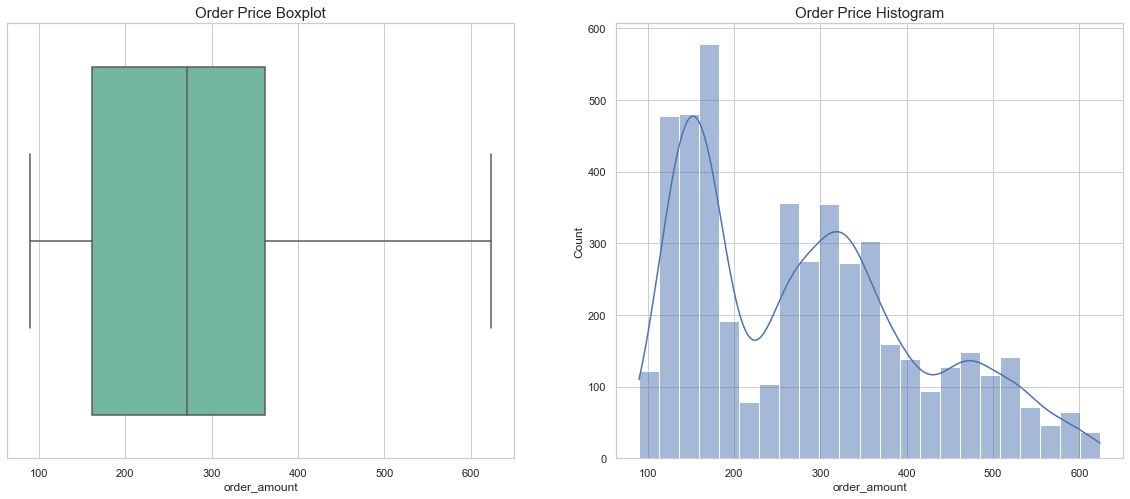

In [ ]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(20, 8)

axs[0].set_title("Order Price Boxplot", size=15)
axs[1].set_title("Order Price Histogram", size=15)

interquartile_range = (challenge_df['order_amount'].quantile(.75) - challenge_df['order_amount'].quantile(.25)) # Q3 - Q1
median = challenge_df['order_amount'].quantile(.5) # Q2

# Outlier rule upper bound
outlier_bound = median + interquartile_range*1.5 

# filter DF with rule
outliers_removed_df = challenge_df[challenge_df['order_amount'] <= outlier_bound]

# create new boxplot and histogram
sns.boxplot(data=outliers_removed_df, x='order_amount', orient="h", palette="Set2", ax=axs[0])
sns.histplot(data=outliers_removed_df, x='order_amount', kde=True, ax=axs[1])


*Ok, well if we want a better idea of the cost per shoe let's compute 2 useful metrics:*
1) The average shoe cost -- the pure average shoe cost
2) The average order shoe cost -- This metric averages the average shoe cost each order regardless of order size

**Advantages of average shoe cost:**
- True average shoe cost
- Good for estimating revenue and predicing future income

**Advantages of average order shoe cost:**
- Prevents large orders from overly-skewing the results (Our distribution is right-skewed)


Between these two metrics. I've elected to go with the average shoe cost since it seems to be what the original analyst envisioned as well as its potential for predictive modeling.

Steps to compute:
1) Sum order_amount column
2) Sum total_items column
3) Divide the order amount sum by the total item sum

In [ ]:
order_amount_sum = challenge_df['order_amount'].sum()
total_items_sum = challenge_df['total_items'].sum()

average_shoe_cost = order_amount_sum / total_items_sum
print("Average Shoe Cost: ${:,.2f}".format(average_shoe_cost))

Average Shoe Cost: $357.92


##### Metric: Average Shoe Cost
**Average Shoe Cost: $357.92**

The number seems far more realistic for the average shoe price in the shopify store and will likely accurately reflect shoe prices from the greater population of shoe prices under the same market conditions.